In [1]:
# IMPORTING ALL THE NECESSARY LIBRARIES
from IPython.display import Audio
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re
import librosa
import librosa.display
from sklearn.preprocessing import minmax_scale
import IPython.display as ipd

from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, recall_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import accuracy_score,log_loss, confusion_matrix,ConfusionMatrixDisplay

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
dirname = '../input/dysarthria-detection'        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dysarthria-detection/torgo_data/data.csv
/kaggle/input/dysarthria-detection/torgo_data/dysarthria_male/M05_Session2_0075.wav
/kaggle/input/dysarthria-detection/torgo_data/dysarthria_male/M02_Session1_0078.wav
/kaggle/input/dysarthria-detection/torgo_data/dysarthria_male/M01_Session2_3_0057.wav
/kaggle/input/dysarthria-detection/torgo_data/dysarthria_male/M03_Session2_0111.wav
/kaggle/input/dysarthria-detection/torgo_data/dysarthria_male/M02_Session1_0066.wav
/kaggle/input/dysarthria-detection/torgo_data/dysarthria_male/M05_Session2_0371.wav
/kaggle/input/dysarthria-detection/torgo_data/dysarthria_male/M03_Session2_0218.wav
/kaggle/input/dysarthria-detection/torgo_data/dysarthria_male/M03_Session2_0380.wav
/kaggle/input/dysarthria-detection/torgo_data/dysarthria_male/M05_Session2_0007.wav
/kaggle/input/dysarthria-detection/torgo_data/dysarthria_male/M05_Session2_0128.wav
/kaggle/input/dysarthria-detection/torgo_data/dysarthria_male/M02_Session2_0199.wav
/kaggle/input/dysar

In [2]:

import warnings
warnings.filterwarnings("ignore")

## Task 1. Read data.csv in pandas
[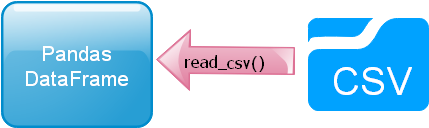!](http://)

In [3]:

d = pd.read_csv("../input/dysarthria-detection/torgo_data/data.csv")
d['filename'] = d['filename'].apply(lambda x: os.path.join(dirname,x))
d



,is_dysarthria,gender,filename
0,non_dysarthria,female,../input/dysarthria-detection/torgo_data/non_d...
1,non_dysarthria,female,../input/dysarthria-detection/torgo_data/non_d...
2,non_dysarthria,female,../input/dysarthria-detection/torgo_data/non_d...
3,non_dysarthria,female,../input/dysarthria-detection/torgo_data/non_d...
4,non_dysarthria,female,../input/dysarthria-detection/torgo_data/non_d...
...,...,...,...
1995,dysarthria,male,../input/dysarthria-detection/torgo_data/dysar...
1996,dysarthria,male,../input/dysarthria-detection/torgo_data/dysar...
1997,dysarthria,male,../input/dysarthria-detection/torgo_data/dysar...
1998,dysarthria,male,../input/dysarthria-detection/torgo_data/dysar...


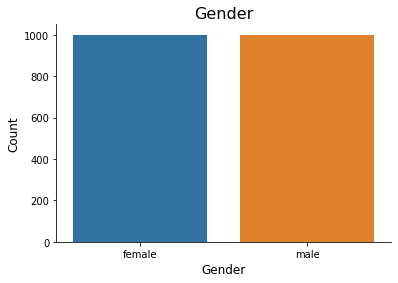

In [4]:
plt.title('Gender', size=16)
sns.countplot( d.gender)
plt.ylabel('Count', size=12)
plt.xlabel('Gender', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()



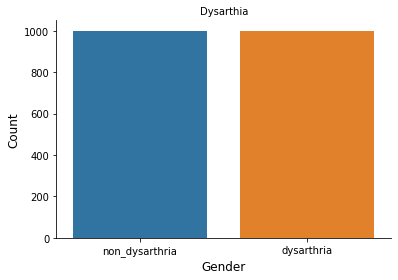

In [5]:
plt.title('Dysarthia', size=10)
sns.countplot( d.is_dysarthria)
plt.ylabel('Count', size=12)
plt.xlabel('Gender', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()




 ## Task 2:
## For any 1 random sample of dysarthric male, dysarthric female, non-dysarthric male, and non-dysarthric female, visualize
[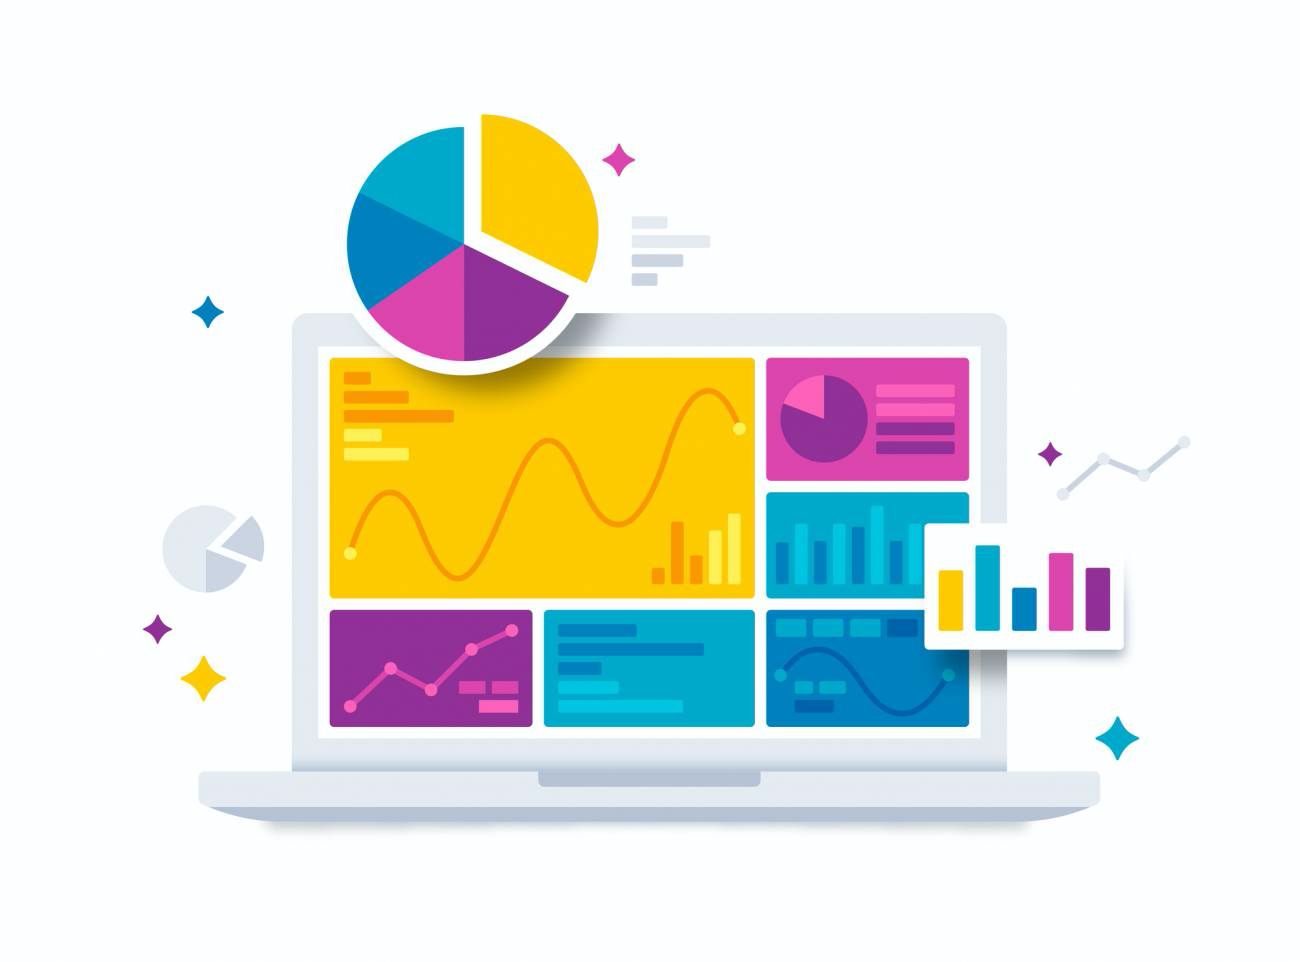](http://)
###  a. Waveplot

        The data parameter represents an audio signal, which is a one-dimensional array of amplitude values that represent the waveform of the audio.

        The sr parameter is an integer that represents the sampling rate of the audio signal, which is the number of samples of the audio that are taken per second.

        The i parameter is a string that represents additional information about the audio, such as its filename or its label.

        The function first creates a new figure with a size of 10 inches by 3 inches, using the plt.figure function.

        The function then sets the title of the figure using the plt.title function, which takes a string as input. The title indicates that the figure shows a waveplot for the audio, along with the additional information specified in the i parameter.

        The librosa.display.waveshow function is then used to display the waveform of the audio signal in the figure. This function takes two arguments as input: the data parameter, which is the audio signal to be displayed, and the sr parameter, which is the sampling rate of the audio signal.

        Finally, the function uses the plt.show function to display the figure on the screen.

###  b. Spectrogram

        
###  c. Zero Crossing rate

        The data parameter represents an audio signal, which is a one-dimensional array of amplitude values that represent the waveform of the audio.

        The sr parameter is an integer that represents the sampling rate of the audio signal, which is the number of samples of the audio that are taken per second.

        The i parameter is a string that represents additional information about the audio, such as its filename or its label.

        The function first computes the zero-crossings of the audio signal using the librosa.zero_crossings function. This function takes a one-dimensional array of audio data as input and returns a binary array indicating the zero-crossings in the audio signal.

        The sum of zero crossings is then calculated using the sum function on the zero_crossings array.

        The function then creates a new figure with a size of 10 inches by 3 inches, using the plt.figure function.

        The function then sets the title of the figure using the plt.title function, which takes a string as input. The title indicates that the figure shows the zero-crossing rate of the audio, along with the additional information specified in the i parameter.

        The zero-crossing rate is then computed using the librosa.feature.zero_crossing_rate function. This function takes a one-dimensional array of audio data as input and returns the fraction of zero crossings relative to the total number of samples in the signal.

        The zero-crossing rate is then plotted using the plt.plot function. The x-axis of the plot represents time, and the y-axis represents the zero-crossing rate.

        Finally, the function uses the plt.show function to display the figure on the screen.

###  d. Spectral Centroid and rolloff,
###  e. MFCC
###  f. Mel Spectrogram



In [6]:
def create_waveplot(data, sr, i):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {}'.format(i), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def create_mel_Spectogram(data, sr, i):
    plt.figure(figsize=(10, 3))
    plt.title('Mel Spectrogram of audio {} emotion'.format(i), size=15)
    mel_spec = librosa.feature.melspectrogram(y=data, sr=sr)
    librosa.display.specshow(mel_spec, sr=sr, x_axis='time')
    plt.show()

    
def create_Spectogram(data, sr, i): # have to check which is spect on log
    
    plt.figure(figsize=(10, 3))
    plt.title('Spectrogram of audio {} '.format(i), size=15)
    X = librosa.stft(data)
    
    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb,sr = sr, x_axis="time",y_axis = "log")
    plt.show() 
        
    
def create_Zero_crossing_rate(data, sr, i):
    
    zero_crossings = librosa.zero_crossings(data)
    print("Sum of zero crossing ", zero_crossings.sum())
    plt.figure(figsize=(10, 3))
    plt.title('Zero Crossing Rate of audio {} '.format(i), size=15)
    zcrs = librosa.feature.zero_crossing_rate(data)
    plt.plot(zcrs[0])
    plt.show()    
    
def create_mfcc(data, sr, i):
    
    plt.figure(figsize=(10, 3))
    plt.title('MFCC of audio {} '.format(i), size=15)
    mfccs = librosa.feature.mfcc(y=data, sr=sr)
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')
    plt.show()
    
def create_Spectral_rolloff(data, sr, i):
    
    plt.figure(figsize=(10, 3))
    plt.title('Spectral Rolloff of audio {} '.format(i), size=15)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=data, sr=sr)[0]
    frames = range(len(spectral_rolloff))
    t = librosa.frames_to_time(frames)
    librosa.display.waveshow(data, sr=sr, alpha=0.4)
    plt.plot(t, spectral_rolloff, color='r')
    plt.show()
   
    
def create_Spectral_centroid(data, sr, i):

    plt.figure(figsize=(10, 3))
    plt.title('Spectral Centroids of audio {} '.format(i), size=15)
    spectral_centroids = librosa.feature.spectral_centroid(data, sr=sr)[0]
    frames = range(len(spectral_centroids))
    t = librosa.frames_to_time(frames)
    librosa.display.waveshow(data, sr=sr, alpha=0.4)
    plt.plot(t, spectral_centroids, color='r')
    plt.show()  

## Male with Dysarthia

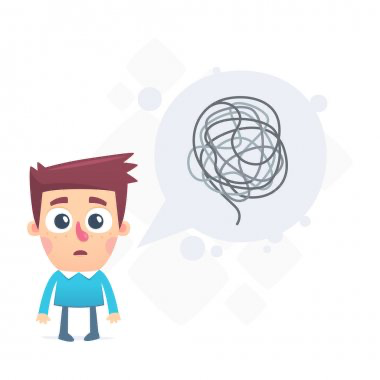!]

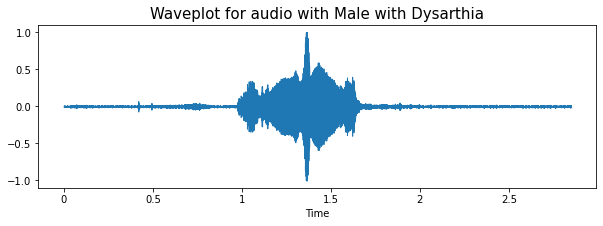

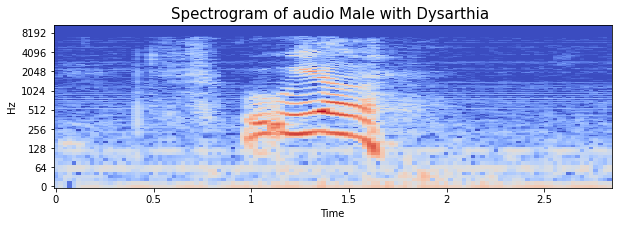

Sum of zero crossing  3290


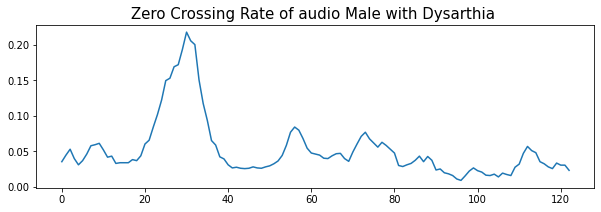

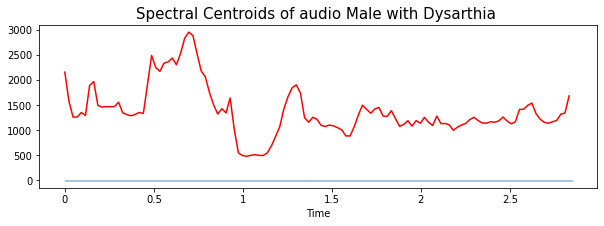

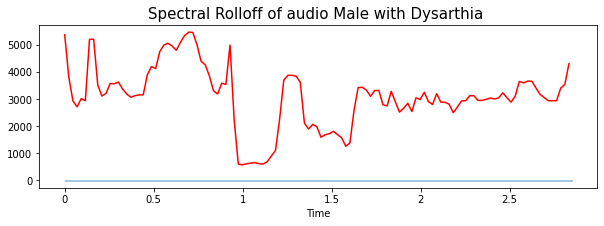

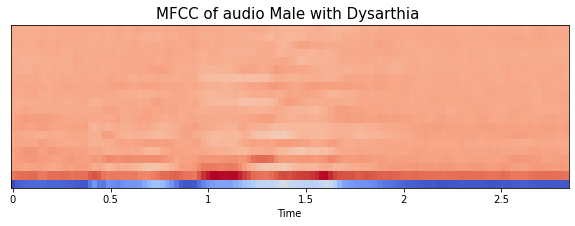

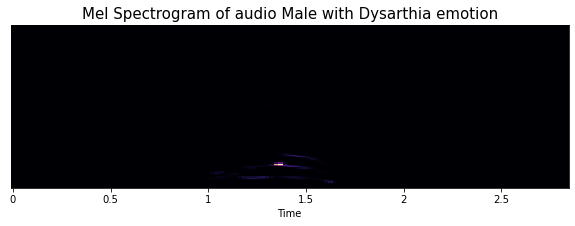

In [7]:
dysarthricMALE = d[(d['gender']=='male') & (d['is_dysarthria']=='dysarthria') ]
DM = dysarthricMALE.sample()
x= DM.iloc[0].filename
info= "Male with Dysarthia"
data, sampling_rate = librosa.load(x)
create_waveplot(data, sampling_rate, info)
create_Spectogram(data, sampling_rate, info)
create_Zero_crossing_rate(data, sampling_rate, info)
create_Spectral_centroid(data, sampling_rate, info)
create_Spectral_rolloff(data, sampling_rate, info)
create_mfcc(data, sampling_rate, info)
create_mel_Spectogram(data, sampling_rate, info)
Audio(x)


## Female with Dysarthia



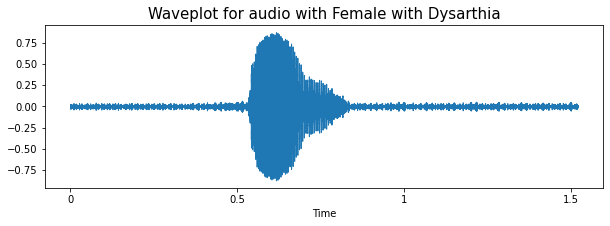

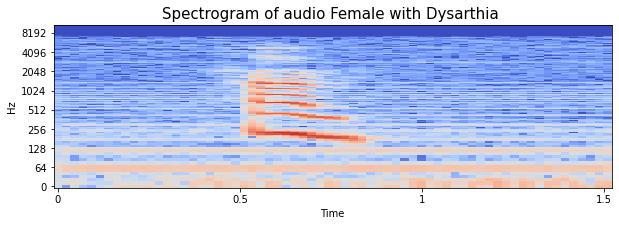

Sum of zero crossing  2736


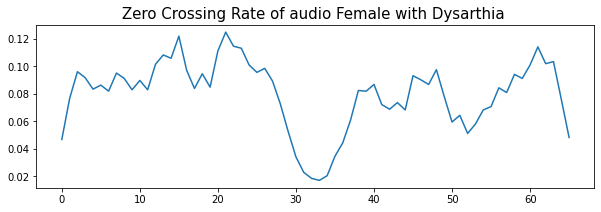

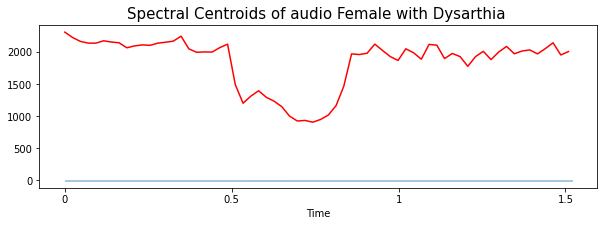

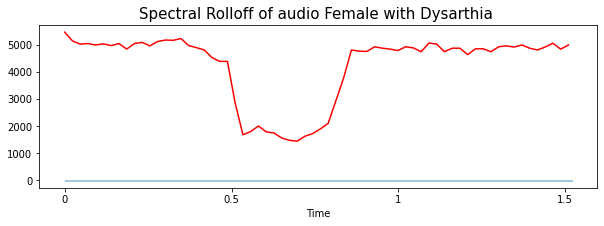

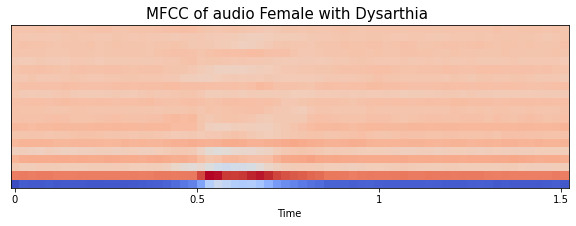

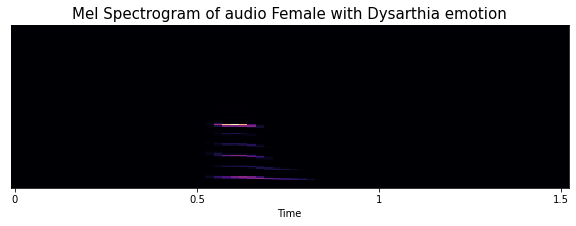

In [8]:
dysarthricFemale = d[(d['gender']=='female') & (d['is_dysarthria']=='dysarthria')]

DF = dysarthricFemale.sample()
x= DF.iloc[0].filename

info= "Female with Dysarthia"
data, sampling_rate = librosa.load(x)
create_waveplot(data, sampling_rate, info)
create_Spectogram(data, sampling_rate, info)
create_Zero_crossing_rate(data, sampling_rate, info)
create_Spectral_centroid(data, sampling_rate, info)
create_Spectral_rolloff(data, sampling_rate, info)
create_mfcc(data, sampling_rate, info)
create_mel_Spectogram(data, sampling_rate, info)
Audio(x)



## Male not with Dysarthia


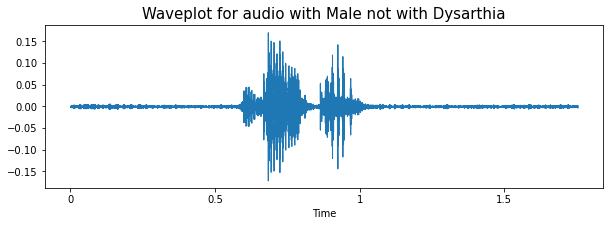

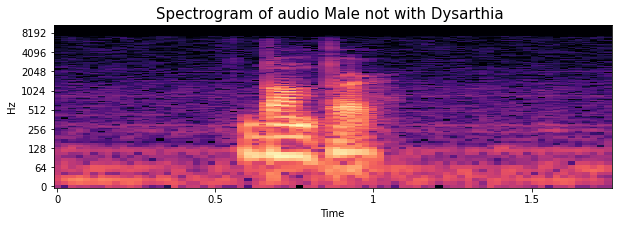

Sum of zero crossing  1341


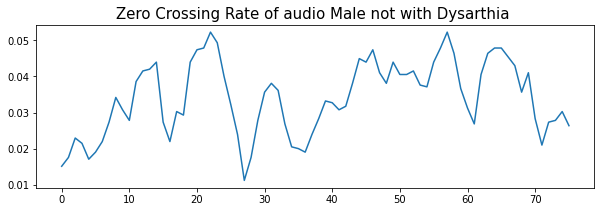

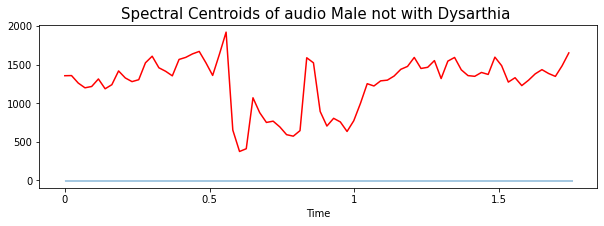

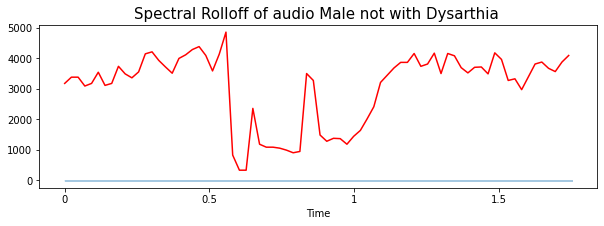

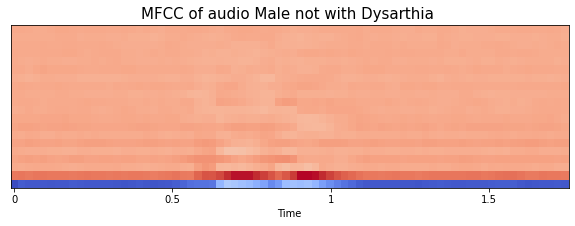

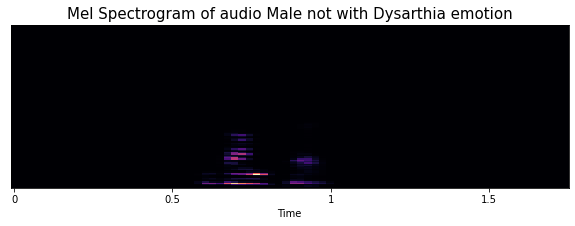

In [9]:
non_dysarthricMale  = d[(d['gender']=='male') & (d['is_dysarthria']=='non_dysarthria')]
NDM = non_dysarthricMale.sample()
v= NDM.iloc[0].filename
info= "Male not with Dysarthia"
data, sampling_rate = librosa.load(v)
create_waveplot(data, sampling_rate, info)
create_Spectogram(data, sampling_rate, info)
create_Zero_crossing_rate(data, sampling_rate, info)
create_Spectral_centroid(data, sampling_rate, info)
create_Spectral_rolloff(data, sampling_rate, info)
create_mfcc(data, sampling_rate, info)
create_mel_Spectogram(data, sampling_rate, info)

Audio(v)



## Female with Non-Dysarthia

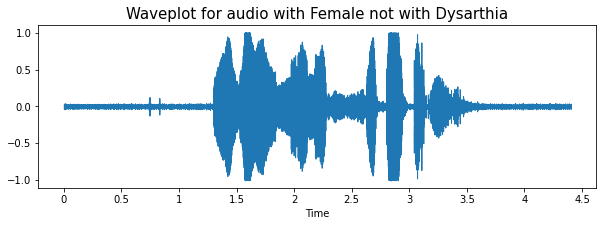

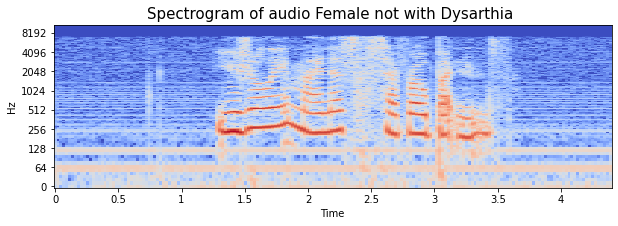

Sum of zero crossing  9776


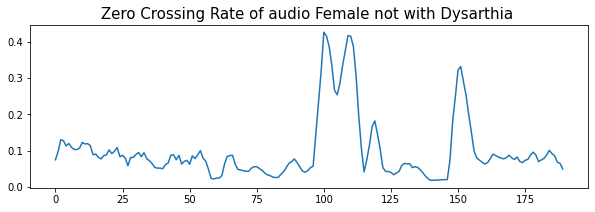

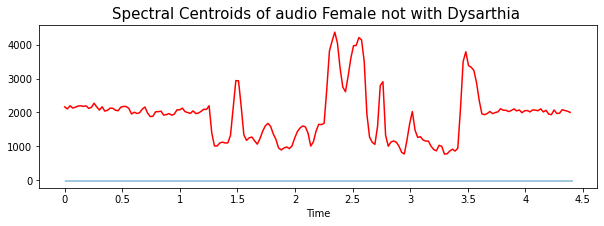

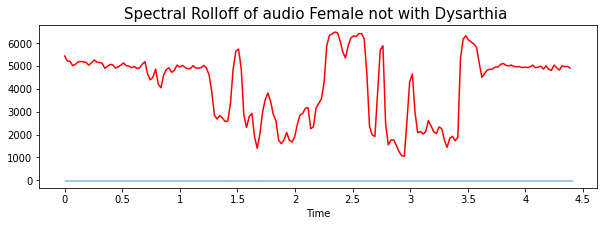

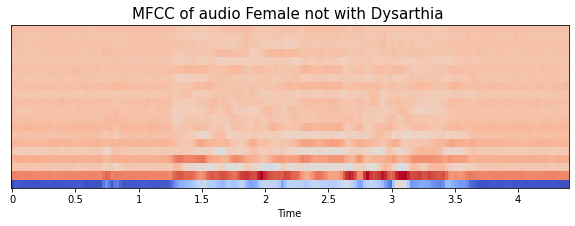

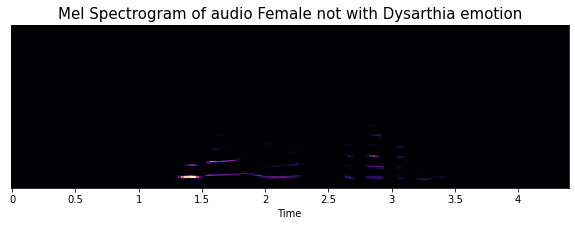

In [10]:
non_dysarthricFemale = d[(d['gender']=='female') & (d['is_dysarthria']=='non_dysarthria')]
NDF= non_dysarthricFemale.sample()
w= NDF.iloc[0].filename
info= "Female not with Dysarthia"
data, sampling_rate = librosa.load(w)
create_waveplot(data, sampling_rate, info)
create_Spectogram(data, sampling_rate, info)
create_Zero_crossing_rate(data, sampling_rate, info)
create_Spectral_centroid(data, sampling_rate, info)
create_Spectral_rolloff(data, sampling_rate, info)
create_mfcc(data, sampling_rate, info)
create_mel_Spectogram(data, sampling_rate, info)

Audio(w)



## Task 3. Comment on the output.

#### Waveplot: The male dysarthric waveplot has abrupt speech signal. The female dysarthric waveplot has abrupt speech  due to the words overlapping
The Non-dysarthric waveplot a  waveplot shows a normal speech waveplot
 
#### Spectrograms
The male and female dysarthric spectrograms have energy magnitudes of the frequencies which are more spread 
The Non dysarthric spectrograms have energy magnitudes that are narrow where they are speaking.

#### Zero Crossing Rate
The male and female dysarthrics Zero Crossing Rate have many peaks of zero crossing rate. It shows a  sudden increase of some words.
The Non dysarthric Zero Crossing Rate is high.

#### Spectral Centroid
The male and female dysarthrics spectral centroids, centroids go down for sometime then go again up.
The Non dysarthric spectral centroids, the centroids stay down for but where the they say something then go up again when they are silent.

#### Spectral Rolloff
Dysarthric Spectral Rolloff ,the 85% coverage below the rolloff frequency is there around the speech.
Non dysarthric Spectral Rolloff the 85% coverageis also at some other places.

#### MFCCs
Dysarthric MFCC is much more darker and concentrated
Non Dysarthric MFCC is more spread accross

### Mel Spectrogram
Dysarthric mel spectrograms show the abtruptness in speaking
Non Dysarthric  mel spectrograms show normal speech

## Task 4. Define a function to create 256 MFCC features for any given audio file.


Could have 128 maximum MFCCs

In [11]:
def mfcc_features_extract(x):

    features_mfcc = []
    try:
        x , sr = librosa.load(x)
        features_mfcc = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=128)
        features_mfcc = np.mean(features_mfcc.T,axis=0)
    except:
        print('Error reading audio')
    return features_mfcc

This is a Python function called mfcc_features_extract that takes an audio file path x as input and returns a feature vector features_mfcc that represents the Mel-Frequency Cepstral Coefficients (MFCCs) of the audio file. Here's a breakdown of how the function works:

    ->The function first initializes an empty list called features_mfcc that will be used to store the extracted MFCC features.

    ->The function then uses the librosa library to load the audio file located at path x into memory, along with its sampling rate sr.

    ->The librosa.feature.mfcc function is then used to extract the MFCCs of the audio signal x. n_mfcc=128 specifies the number of MFCC coefficients to extract for each frame of the audio signal.

    ->The extracted MFCCs are then averaged over time using the numpy library's mean function, resulting in a single feature vector of length 128.

    ->If an error occurs while reading the audio file, the function prints an error message.

    ->Finally, the function returns the features_mfcc feature vector.

In summary, this function takes an audio file path as input, extracts the MFCC features of the audio signal using the librosa library, and returns a feature vector representing the MFCCs. This feature vector can then be used as input to machine learning algorithms for tasks such as speech recognition, music genre classification, and emotion detection.

In [12]:
N= d['filename'].apply(lambda a: mfcc_features_extract(a))


Error reading audio


In [13]:
N= N.tolist()
N= pd.DataFrame(N)

In [14]:
N.head(10)

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-222.457077,102.146935,-17.265686,38.949039,-13.736136,20.581657,-5.038507,9.669348,2.852035,-1.724100,...,1.330539,0.959738,0.782641,0.988810,0.482095,-0.025945,0.654508,0.499423,0.240431,-0.257057
1,-300.215210,110.792397,-17.835419,39.316513,-17.007551,22.735220,2.369241,17.929928,4.389093,3.490597,...,1.446290,1.091978,0.965665,1.435454,-0.224936,-1.078653,-0.329877,0.278370,-0.274176,-0.642529
2,-303.913361,113.325172,-24.710556,45.542671,-22.632982,26.017168,1.537213,17.134033,5.634882,3.570631,...,1.140907,0.793990,0.478094,1.164105,-0.163656,-1.209489,0.024640,0.433807,-0.406458,-0.485287
3,-211.974976,117.983017,-36.248325,38.447906,-27.372046,25.304882,-6.710573,11.927542,0.885225,2.587593,...,1.135721,0.547349,0.990486,0.629700,0.259464,-0.164846,0.062285,0.314661,-0.045342,-0.274535
4,-281.211090,105.812836,-18.269186,45.741081,-15.748901,27.830769,-2.712293,15.742901,5.896017,0.358894,...,1.646695,1.533421,0.922572,0.878170,0.324768,0.115258,-0.145911,-0.038609,-0.655331,-0.362039
5,-279.243713,101.549843,-14.545247,43.771034,-20.750765,28.204527,-2.113040,16.293955,5.212938,2.370983,...,1.105241,1.241872,0.599105,0.809635,0.189292,-0.254489,-0.026493,0.275561,-0.573421,-0.478691
6,-260.429626,106.949501,-18.940556,39.577473,-20.937639,25.124037,-0.150493,12.404461,0.519044,1.363603,...,1.339865,1.123047,0.886523,1.219861,0.469589,-0.129908,0.245215,0.710445,-0.097494,0.083109
7,-260.356628,119.570793,-12.621312,32.450829,-19.742584,17.546911,2.765201,7.252509,0.462977,5.240708,...,0.456419,-0.082434,0.334693,0.439577,-0.023259,-1.012125,-0.061827,0.285808,-0.274020,-0.277148
8,-299.762238,111.119972,-21.424379,36.604053,-18.606598,23.688692,7.423238,20.190962,6.735855,4.014423,...,1.404348,1.082514,0.644701,1.166490,-0.367917,-0.899011,-0.363546,-0.034175,-0.736846,-0.526397
9,-309.480896,117.617844,-25.670959,39.831596,-13.042587,4.185407,-11.869982,-5.867709,-1.187861,-0.437127,...,0.693004,0.907460,0.362480,-0.039343,-0.026514,-0.130181,-0.038047,-0.327643,-0.024512,0.195595


## Task 5. Split the data into training and validation by a ratio of 90:10.


In [15]:
N['Dysarthia'] = d['is_dysarthria']

In [16]:
N.loc[N['Dysarthia']=='non_dysarthria','Dysarthia'] = 0
N.loc[N['Dysarthia']=='dysarthria','Dysarthia'] = 1

In [17]:
N["Dysarthia"].value_counts()

0    1000
1    1000
Name: Dysarthia, dtype: int64

In [18]:
N.isna().sum().sum()

128

In [19]:
N = N.dropna()

In [20]:
N["Dysarthia"].value_counts()

0    1000
1     999
Name: Dysarthia, dtype: int64

In [21]:
X = N.drop(['Dysarthia'],axis=1)
y = N['Dysarthia'].astype(float)

In [22]:
print("Shape of X and y: ", X.shape, y.shape)

Shape of X and y:  (1999, 128) (1999,)


In [23]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1)

In [24]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_val_scaled = sc.transform(X_val)

## Task 6. Build the CNN model with padding on a training set.

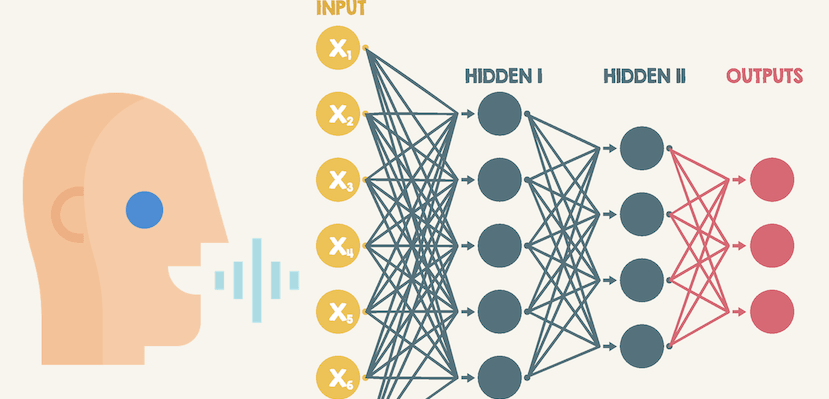

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [26]:
X_train_scaled = X_train_scaled.reshape(-1,16,8,1)
X_val_scaled = X_val_scaled.reshape(-1,16,8,1)
print("Shape of X_train and X_test: ", X_train_scaled.shape, X_val_scaled.shape)

Shape of X_train and X_test:  (1799, 16, 8, 1) (200, 16, 8, 1)


In [58]:

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(16, 8, 1)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding = "same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding = "same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding = "same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [59]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 16, 8, 16)         160       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 4, 16)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 4, 16)          2320      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 2, 16)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 2, 16)          2320      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 2, 1, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 32)               

In [60]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [61]:
cb = EarlyStopping(monitor='val_loss', patience = 5, verbose = 1)

In [62]:
history = model.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_val_scaled,y_val), callbacks=[cb])

Epoch 1/50
57/57 [==============================] - 1s 10ms/step - loss: 0.6378 - accuracy: 0.6570 - val_loss: 0.5259 - val_accuracy: 0.7450
Epoch 2/50
57/57 [==============================] - 0s 6ms/step - loss: 0.4605 - accuracy: 0.7804 - val_loss: 0.4243 - val_accuracy: 0.8100
Epoch 3/50
57/57 [==============================] - 0s 6ms/step - loss: 0.3433 - accuracy: 0.8466 - val_loss: 0.2774 - val_accuracy: 0.9000
Epoch 4/50
57/57 [==============================] - 0s 6ms/step - loss: 0.2288 - accuracy: 0.9177 - val_loss: 0.2061 - val_accuracy: 0.9250
Epoch 5/50
57/57 [==============================] - 0s 6ms/step - loss: 0.1564 - accuracy: 0.9528 - val_loss: 0.1452 - val_accuracy: 0.9400
Epoch 6/50
57/57 [==============================] - 0s 6ms/step - loss: 0.1021 - accuracy: 0.9672 - val_loss: 0.1195 - val_accuracy: 0.9650
Epoch 7/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0839 - accuracy: 0.9722 - val_loss: 0.1222 - val_accuracy: 0.9700
Epoch 8/50
57/57 [=

## Task 7: Evaluate the validation set

### Visualization

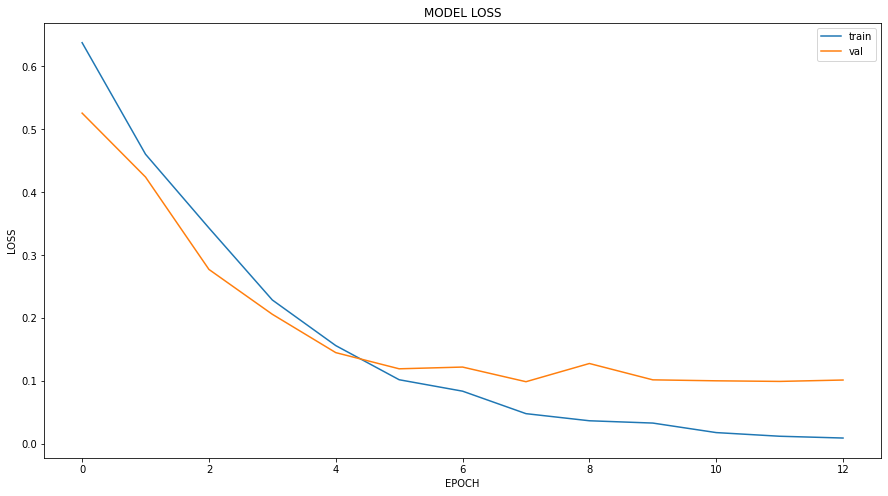

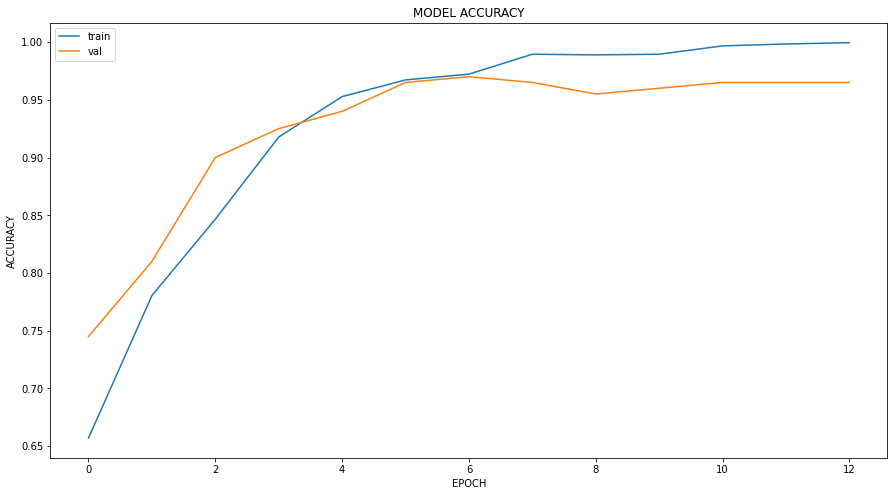

In [63]:
plt.figure(figsize=(15,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('EPOCH')
plt.ylabel('LOSS')
plt.title('MODEL LOSS')
plt.legend(['train', 'val'])
plt.show()

plt.figure(figsize=(15,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('EPOCH')
plt.ylabel('ACCURACY')
plt.title('MODEL ACCURACY')
plt.legend(['train', 'val'])
plt.show()

In [64]:
ypred = model.predict(X_val_scaled)

## Task 8. Calculate and comment on ROC AUC score, recall score and confusion matrix.





In [65]:
roc_auc_score(y_val,ypred)

0.9945994599459946

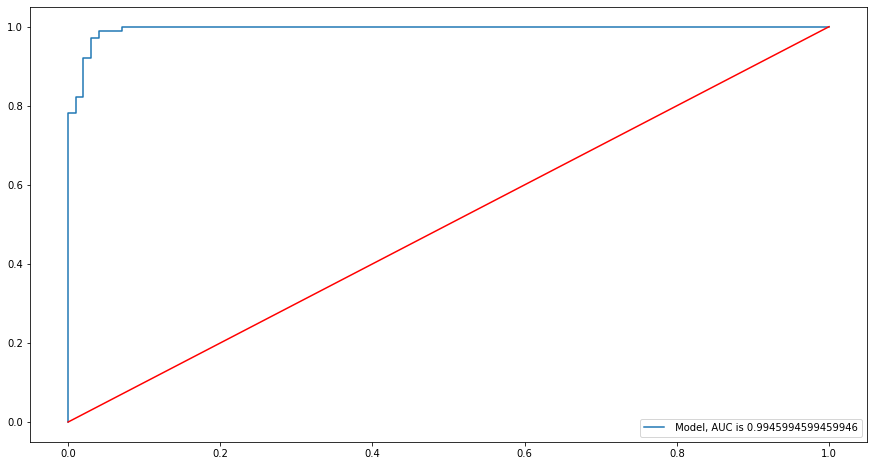

In [66]:
plt.figure(figsize=(15,8))
f, t, _ = roc_curve(y_val,  ypred)
AUC_score = roc_auc_score(y_val, ypred)
plt.plot(f,t,label=" Model, AUC is "+str(AUC_score))
plt.plot([0, 1], [0, 1], color="red")
plt.legend(loc=4)
plt.show()


### ROC AUC score is 98.5 99. The model is good enough as it is approximately 1, it distinguishes between  dysarthric and non dysarthric people well.

In [67]:
ypred[ypred>=0.5] = 1
ypred[ypred<0.5] = 0

### Recall Score

In [68]:
print("Recall Score ",recall_score(y_val,ypred))

Recall Score  0.9702970297029703



### Recall is the measure of correctly classified  dysarthric and non dysarthric people. The model is giving recall of 98.9% which is good enough.

### Classification Report

In [69]:
print(classification_report(y_val,ypred))


              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96        99
         1.0       0.96      0.97      0.97       101

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200



### Confusion Matrix



Testing Accuracy =  96.5


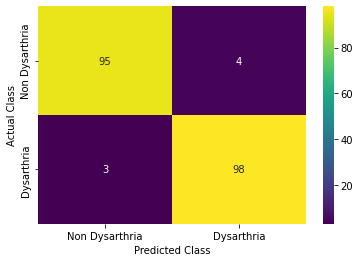

In [70]:

print("Testing Accuracy = ",accuracy_score(y_val,ypred)*100)
sns.heatmap(confusion_matrix(y_val, ypred),cmap='viridis',annot=True,fmt='.3g',
            xticklabels=['Non Dysarthria','Dysarthria'],yticklabels=['Non Dysarthria','Dysarthria'])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()




#### No. of misclassifications:  1/103  from Non Dysarthia

#### No. of misclassifications:  2/97 from Dysarthia

### CONCLUSION: The model works well however it can be worked upon for further improvement.